In [1]:
#Using Spotify data, who are the most popular artists by # of streams and # of appearances (weeks of the same song and new songs) in Top 200 in the US over the past year (11/2019 - 11/2020)?

In [40]:
#Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import csv
import scipy.stats as st
from scipy.stats import linregress

#Read CSV
global_data = pd.read_csv("Global_combined.csv", header=0)
us_data = pd.read_csv("US_combined.csv",header=1)
global_data.head()
us_data.head()

,Position,Track Name,Artist,Streams,URL,Date,Unique ID
0,001,The Box,Roddy Ricch,12533419,https://open.spotify.com/track/0nbXyq5TXYPCO7p...,01.02.20,01.02.20_001
1,002,ROXANNE,Arizona Zervas,9844160,https://open.spotify.com/track/696DnlkuDOXcMAn...,01.02.20,01.02.20_002
2,003,Circles,Post Malone,7932216,https://open.spotify.com/track/21jGcNKet2qwijl...,01.02.20,01.02.20_003
3,004,BOP,DaBaby,7560429,https://open.spotify.com/track/6Ozh9Ok6h4Oi1wU...,01.02.20,01.02.20_004
4,005,Falling,Trevor Daniel,7197448,https://open.spotify.com/track/4TnjEaWOeW0eKTK...,01.02.20,01.02.20_005


In [20]:
#find headers in data
#len(us_data)
#len(global_data)
#us_data["Position"].value_counts()
global_data["Position"].value_counts()

180    52
060    52
108    52
140    52
016    52
       ..
015    52
162    52
055    52
018    52
101    52
Name: Position, Length: 200, dtype: int64

In [19]:
#Drop header and convert streams to integer 
global_data.drop(global_data[global_data.Position == "Position"].index, inplace=True)
global_data["Streams"] = global_data["Streams"].astype(int)
global_data["Artist"] = global_data["Artist"].str.replace('$','S')
global_data["Track Name"] = global_data["Track Name"].str.replace('$','S')

us_data.drop(us_data[us_data.Position == "Position"].index, inplace=True)
us_data["Streams"] = us_data["Streams"].astype(int)
us_data["Artist"] = us_data["Artist"].str.replace('$','S')
us_data["Track Name"] = us_data["Track Name"].str.replace('$','S')

len(us_data)
len(global_data)

10400

In [21]:
#Create unique list of artists, count number of times they appear on top 200 globally during time period
global_data["Artist"].unique()
global_hits_count = global_data["Artist"].value_counts()

#Put count into a dataframe
global_hits_count = pd.DataFrame(global_hits_count)
global_hits_count = global_hits_count.reset_index()
global_hits_count.columns = ['Artist', 'List count']

global_hits_count.head()

,Artist,List count
0,Juice WRLD,309
1,Billie Eilish,303
2,Post Malone,302
3,Bad Bunny,290
4,Ed Sheeran,239


In [29]:
#Create unique list of artists, count number of times they appear on top 200 in the US during time period
us_data["Artist"].unique()
us_hits_count = us_data["Artist"].value_counts()

#Put count into a dataframe
us_hits_count = pd.DataFrame(us_hits_count)
us_hits_count = us_hits_count.reset_index()
us_hits_count.columns = ['Artist', 'List count']

us_hits_count.head()


,Artist,List count
0,Juice WRLD,556
1,Post Malone,457
2,Billie Eilish,293
3,Lil Uzi Vert,288
4,DaBaby,250


In [30]:
#Groupby artist and sum their individual number of streams
global_streams = global_data.groupby("Artist")
global_streams = global_streams.sum()
global_streams = global_streams.sort_values("Streams", ascending=False)

#Put sums into a dataframe
global_streams = pd.DataFrame(global_streams)
global_streams = global_streams.reset_index()

global_streams.head()

,Artist,Streams
0,Billie Eilish,2.797831e+09
1,Bad Bunny,2.736754e+09
2,Juice WRLD,2.703241e+09
3,Post Malone,2.630329e+09
4,The Weeknd,2.580859e+09


In [32]:
#Groupby artist and sum their individual number of streams
us_hits_streams = us_data.groupby("Artist")
us_hits_streams = us_hits_streams.sum()
us_hits_streams = us_hits_streams.sort_values("Streams", ascending=False)

#Put sums into a dataframe
us_hits_streams = pd.DataFrame(us_hits_streams)
us_hits_streams = us_hits_streams.reset_index()

us_hits_streams.head()

,Artist,Streams
0,Juice WRLD,1806825092
1,Post Malone,1203055140
2,DaBaby,874590502
3,Lil Uzi Vert,841575775
4,Billie Eilish,732809768


In [36]:
#Merges for plotting
us_plots = us_hits_count.merge(us_hits_streams, on="Artist")
us_plots.head()

global_plots = global_hits_count.merge(global_streams, on="Artist")
global_plots.head()

,Artist,List count,Streams
0,Juice WRLD,309,2.703241e+09
1,Billie Eilish,303,2.797831e+09
2,Post Malone,302,2.630329e+09
3,Bad Bunny,290,2.736754e+09
4,Ed Sheeran,239,1.727011e+09


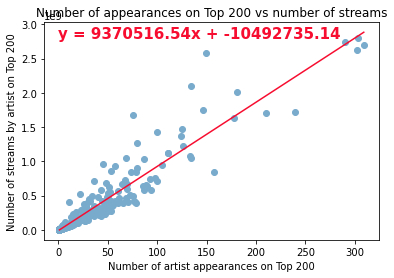

Correlation coefficient = 0.9



In [50]:
#Global regress
x_axis = global_plots["List count"]
y_axis = global_plots["Streams"]
x_max = global_plots["Streams"].max()

# run linregress to get components for correlaton coefficient and regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis,  y_axis)
regress_values = x_axis * slope + intercept

# calc correlation coefficient and format regression model equation
correlation_coefficient = round(rvalue**2, 2)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# format and print plot
fig = plt.figure()
plt.scatter(x_axis, y_axis, marker="o", facecolors="#79abcd")
plt.plot(x_axis,regress_values,"#f70d30")
plt.annotate(line_eq, (0, x_max), fontsize=15,color="#f70d30",fontweight="bold")
plt.title("Number of appearances on Top 200 vs number of streams")
plt.xlabel("Number of artist appearances on Top 200")
plt.ylabel("Number of streams by artist on Top 200")
plt.show()
print(f'Correlation coefficient = {correlation_coefficient}')
print('')